In [77]:
import pandas as pd
import numpy as np

In [78]:
import logging

In [79]:
logging.basicConfig(level=logging.WARN)
logger = logging.getLogger(__name__)

In [80]:
csv_url= 'wine_data_regr.csv'

In [81]:
try:
  dataset = pd.read_csv(csv_url, sep=',')
except Exception as e:
  logger.exception(f'Oj, coś poszło nie tak. Error: {e}')

In [82]:
dataset.shape

(120916, 62)

In [83]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120916 entries, 0 to 120915
Data columns (total 62 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   points         120916 non-null  float64
 1   price          120916 non-null  float64
 2   acid           120916 non-null  int64  
 3   angular        120916 non-null  int64  
 4   austere        120916 non-null  int64  
 5   barnyard       120916 non-null  int64  
 6   bright         120916 non-null  int64  
 7   butter         120916 non-null  int64  
 8   cassis         120916 non-null  int64  
 9   charcoal       120916 non-null  int64  
 10  cigar          120916 non-null  int64  
 11  complex        120916 non-null  int64  
 12  cream          120916 non-null  int64  
 13  crisp          120916 non-null  int64  
 14  dense          120916 non-null  int64  
 15  earth          120916 non-null  int64  
 16  elegant        120916 non-null  int64  
 17  flabby         120916 non-nul

In [84]:
print(f"Quality {set(dataset['points'])}")

Quality {80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0}


<AxesSubplot:title={'center':'Rozkład danych "points"'}>

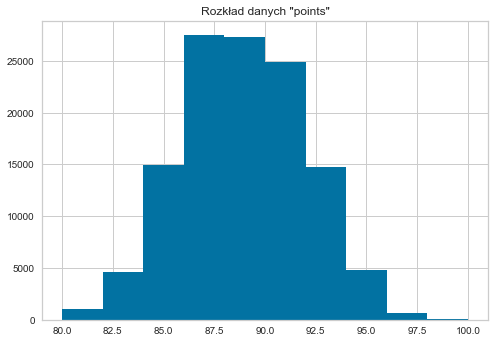

In [85]:
import matplotlib.pyplot as plt
plt.title('Rozkład danych "points"')
dataset['points'].hist()

In [86]:
dataset.head()

,points,price,acid,angular,austere,barnyard,bright,butter,cassis,charcoal,...,Italy,New Zealand,Portugal,Romania,South Africa,Spain,Turkey,US,Uruguay,Other
0,88.0,18.0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,90.0,30.0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,90.0,17.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,87.0,45.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,88.0,25.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [87]:
dataset.tail()

,points,price,acid,angular,austere,barnyard,bright,butter,cassis,charcoal,...,Italy,New Zealand,Portugal,Romania,South Africa,Spain,Turkey,US,Uruguay,Other
120911,92.0,25.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
120912,91.0,93.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120913,87.0,34.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
120914,87.0,14.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
120915,84.0,30.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [88]:
data = dataset.sample(frac=0.9, random_state=786)

In [89]:
data.head()

,points,price,acid,angular,austere,barnyard,bright,butter,cassis,charcoal,...,Italy,New Zealand,Portugal,Romania,South Africa,Spain,Turkey,US,Uruguay,Other
23067,85.0,15.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
43114,89.0,17.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51472,88.0,16.0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
25629,86.0,32.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
19806,90.0,35.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [90]:
data.reset_index(drop=True, inplace=True)
data.head()

,points,price,acid,angular,austere,barnyard,bright,butter,cassis,charcoal,...,Italy,New Zealand,Portugal,Romania,South Africa,Spain,Turkey,US,Uruguay,Other
0,85.0,15.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,89.0,17.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,88.0,16.0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,86.0,32.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,90.0,35.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [91]:
data_unseen = dataset.drop(data.index)

In [92]:
data_unseen.reset_index(drop=True, inplace=True)
data_unseen.head()

,points,price,acid,angular,austere,barnyard,bright,butter,cassis,charcoal,...,Italy,New Zealand,Portugal,Romania,South Africa,Spain,Turkey,US,Uruguay,Other
0,86.0,11.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,84.0,32.0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,89.0,24.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,90.0,27.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,88.0,12.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
print(f'Dane treningowe: {data.shape}')
print(f'Dane testowe: {data_unseen.shape}')

Dane treningowe: (108824, 62)
Dane testowe: (12092, 62)


In [94]:
print(set(data['points']))

print(set(data_unseen['points']))

{80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0}
{80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0}


In [95]:
from pycaret.regression import *

In [102]:
exp1 = setup(data=data, target='points', session_id=122, log_experiment=True)

,Description,Value
0,session_id,122
1,Target,points
2,Original Data,"(108824, 62)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,60
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(76176, 61)"


INFO:logs:Logging experiment in MLFlow
2022/05/07 13:42:29 INFO mlflow.tracking.fluent: Experiment with name 'reg-default-name' does not exist. Creating a new experiment.
INFO:logs:SubProcess save_model() called ==================================
INFO:logs:Initializing save_model()
INFO:logs:save_model(model=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='points',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy=...
               

In [103]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,1.7322,4.8472,2.2016,0.4766,0.0247,0.0197,0.5040
gbr,Gradient Boosting Regressor,1.7750,5.0548,2.2482,0.4542,0.0252,0.0201,7.8570
rf,Random Forest Regressor,1.8087,5.4081,2.3255,0.4160,0.0261,0.0205,33.1000
et,Extra Trees Regressor,1.8507,5.8269,2.4138,0.3708,0.0271,0.0210,49.8690
knn,K Neighbors Regressor,1.9253,6.0103,2.4515,0.3510,0.0275,0.0218,3.0890
ada,AdaBoost Regressor,1.9994,6.1572,2.4812,0.3352,0.0277,0.0225,9.1660
lar,Least Angle Regression,1.9969,6.4336,2.5360,0.3053,0.0282,0.0226,0.0840
br,Bayesian Ridge,1.9969,6.4336,2.5360,0.3053,0.0282,0.0226,0.7140
ridge,Ridge Regression,1.9969,6.4336,2.5360,0.3053,0.0282,0.0226,0.0800
lr,Linear Regression,1.9969,6.4336,2.5360,0.3053,0.0282,0.0226,0.9440


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=122, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


In [97]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.7236,4.7799,2.1863,0.4803,0.0245,0.0195
1,1.7457,4.9311,2.2206,0.4721,0.0249,0.0198
2,1.7174,4.8013,2.1912,0.4879,0.0246,0.0195
3,1.7195,4.8390,2.1998,0.4774,0.0247,0.0195
4,1.7572,4.9716,2.2297,0.4717,0.0250,0.0199
5,1.7361,4.8775,2.2085,0.4682,0.0248,0.0197
6,1.7291,4.8000,2.1909,0.4784,0.0246,0.0196
7,1.7440,4.8532,2.2030,0.4717,0.0247,0.0198
8,1.7394,4.8678,2.2063,0.4765,0.0248,0.0197


INFO:logs:create_model_container: 24
INFO:logs:master_model_container: 24
INFO:logs:display_container: 9
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=122, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [104]:
gbr= create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.7654,4.9842,2.2325,0.4581,0.0250,0.0200
1,1.7893,5.1404,2.2673,0.4497,0.0255,0.0203
2,1.7664,5.0238,2.2414,0.4642,0.0251,0.0200
3,1.7635,5.0537,2.2480,0.4542,0.0253,0.0200
4,1.8003,5.1741,2.2747,0.4502,0.0255,0.0204
5,1.7770,5.0648,2.2505,0.4478,0.0253,0.0202
6,1.7736,5.0356,2.2440,0.4528,0.0252,0.0201
7,1.7889,5.0641,2.2503,0.4488,0.0253,0.0203
8,1.7732,5.0526,2.2478,0.4567,0.0252,0.0201


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 3
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=122, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [65]:
tuned_lightgbm = tune_model(lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.7264,4.7928,2.1893,0.4789,0.0246,0.0196
1,1.7487,4.9441,2.2235,0.4707,0.0250,0.0199
2,1.7176,4.7997,2.1908,0.4881,0.0246,0.0195
3,1.7262,4.8716,2.2072,0.4739,0.0248,0.0196
4,1.7569,4.9874,2.2333,0.4700,0.0250,0.0199
5,1.7332,4.8894,2.2112,0.4669,0.0248,0.0197
6,1.7272,4.7786,2.1860,0.4807,0.0245,0.0196
7,1.7432,4.8596,2.2045,0.4710,0.0247,0.0198
8,1.7421,4.8921,2.2118,0.4739,0.0248,0.0198


INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 6
INFO:logs:LGBMRegressor(bagging_fraction=0.8, bagging_freq=0, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.6,
              importance_type='split', learning_rate=0.4, max_depth=-1,
              min_child_samples=76, min_child_weight=0.001, min_split_gain=0.3,
              n_estimators=60, n_jobs=-1, num_leaves=40, objective=None,
              random_state=122, reg_alpha=1e-06, reg_lambda=1e-07,
              silent='warn', subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


In [105]:
tuned_gbr = tune_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.7172,4.7635,2.1825,0.4821,0.0245,0.0195
1,1.7410,4.9354,2.2216,0.4717,0.0249,0.0198
2,1.6997,4.7326,2.1754,0.4953,0.0244,0.0193
3,1.7082,4.8073,2.1926,0.4809,0.0246,0.0194
4,1.7506,4.9576,2.2266,0.4732,0.0249,0.0198
5,1.7201,4.8587,2.2042,0.4702,0.0248,0.0195
6,1.7170,4.7529,2.1801,0.4835,0.0244,0.0195
7,1.7266,4.7976,2.1903,0.4778,0.0246,0.0196
8,1.7230,4.8266,2.1969,0.4810,0.0246,0.0195


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 4
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=7,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.3, min_impurity_split=None,
                          min_samples_leaf=4, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=122, subsample=0.85, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


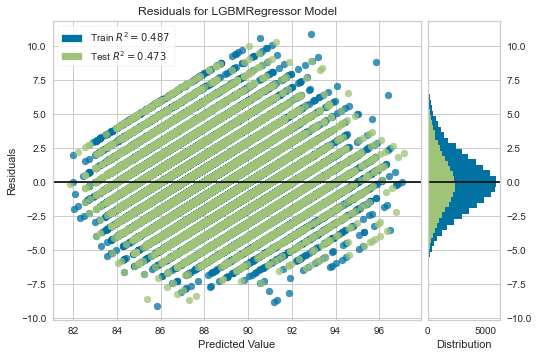

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [67]:
plot_model(tuned_lightgbm)

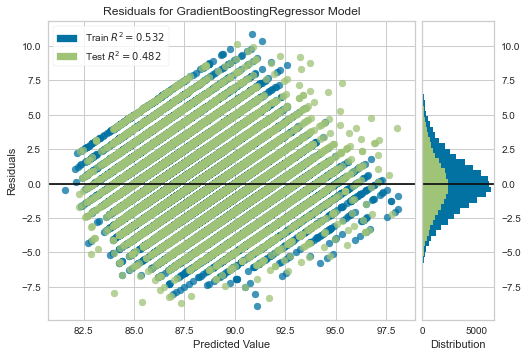

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [68]:
plot_model(tuned_gbr)

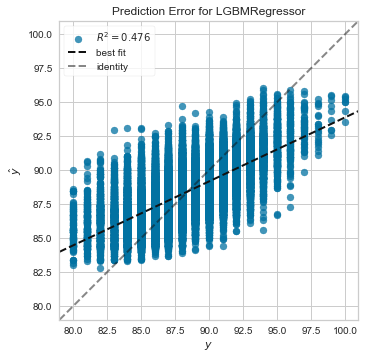

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [69]:
plot_model(tuned_gbr, plot='error')

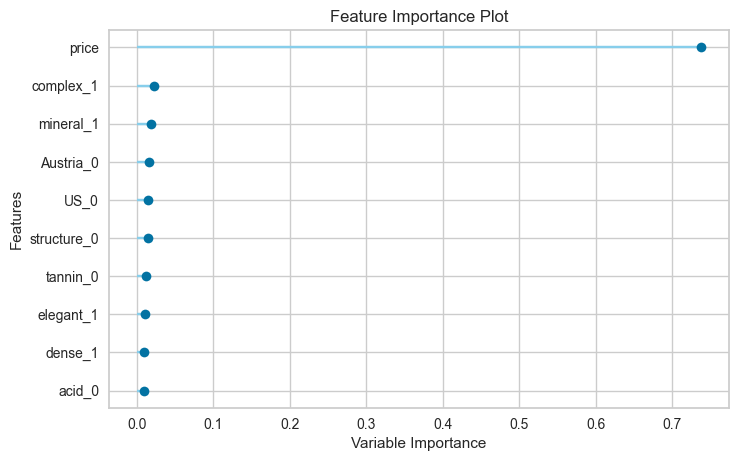

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [70]:
plot_model(tuned_gbr, plot='feature')

In [71]:
evaluate_model(tuned_gbr)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=7,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.3, min_impurity_split=None,
                          min_samples_leaf=4, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=122, subsample=0.85, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [72]:
final = finalize_model(tuned_gbr)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=7,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.3, min_impurity_split=None,
                          min_samples_leaf=4, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=122, subsample=0.85, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learnin

In [73]:
predict_model(final)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=7,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.3, min_impurity_split=None,
                          min_samples_leaf=4, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=122, subsample=0.85, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing displ

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,1.6416,4.4355,2.1061,0.5221,0.0237,0.0186


,price,acid_0,angular_1,austere_0,barnyard_0,bright_1,butter_0,cassis_1,charcoal_1,cigar_1,...,Portugal_1,Romania_1,South Africa_0,Spain_1,Turkey_0,US_0,Uruguay_0,Other_1,points,Label
0,12.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,85.0,86.111788
1,18.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,87.0,87.860854
2,18.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,85.0,86.449153
3,50.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,90.0,90.037567
4,27.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,86.0,88.395606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32643,48.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,92.0,91.093133
32644,75.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,92.0,90.251127
32645,15.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,87.0,86.109749
32646,15.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,87.0,87.779937


In [74]:
save_model(final, model_name='20220507_regressor')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=7,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.3, min_impurity_split=None,
                          min_samples_leaf=4, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=122, subsample=0.85, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), model_name=20220507_regressor, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      i

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='points',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy=...
                                            learning_rate=0.1, loss='ls',
                                            max_depth=7, max_features=1.0,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.3,
                            

In [76]:
with mlflow.start_run():
        lr = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
        lr.fit(train_x, train_y)

        predicted_qualities = lr.predict(test_x)

        (rmse, mae, r2) = eval_metrics(test_y, predicted_qualities)

        print("GBR model (alpha=%f, l1_ratio=%f):" % (alpha, l1_ratio))
        print("  RMSE: %s" % rmse)
        print("  MAE: %s" % mae)
        print("  R2: %s" % r2)

        mlflow.log_param("alpha", alpha)
        mlflow.log_param("l1_ratio", l1_ratio)
        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("r2", r2)
        mlflow.log_metric("mae", mae)

        tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

        # Model registry does not work with file store
        if tracking_url_type_store != "file":

            # Register the model
            # There are other ways to use the Model Registry, which depends on the use case,
            # please refer to the doc for more information:
            # https://mlflow.org/docs/latest/model-registry.html#api-workflow
            mlflow.sklearn.log_model(lr, "model", registered_model_name="ElasticnetWineModel")
        else:
            mlflow.sklearn.log_model(lr, "model")

^C
